##Problem statement:

As a data scientist at **Amazon**, you are given a dataset that has details about different customers with features like
- 'ID',
- 'n_clicks',
- 'n_visits', etc,

You are asked to segment these customers so that the **Amazon** can provide relevant and similar items to their customers, which will increase their overall sale.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2023-12-22 14:40:01--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.251.162.100, 142.251.162.139, 142.251.162.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8krc76pk6qfadn6ben5s7b1shqjncjbf/1703256000000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=48a5dc00-3bea-4878-912b-15d81e50e0ba [following]
--2023-12-22 14:40:01--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8krc76pk6qfadn6ben5s7b1shqjncjbf/1703256000000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=48a5dc00-3bea-4878-912b-15d81e50e0ba
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 173.194.216.132, 

Let's look at the provided features in our dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


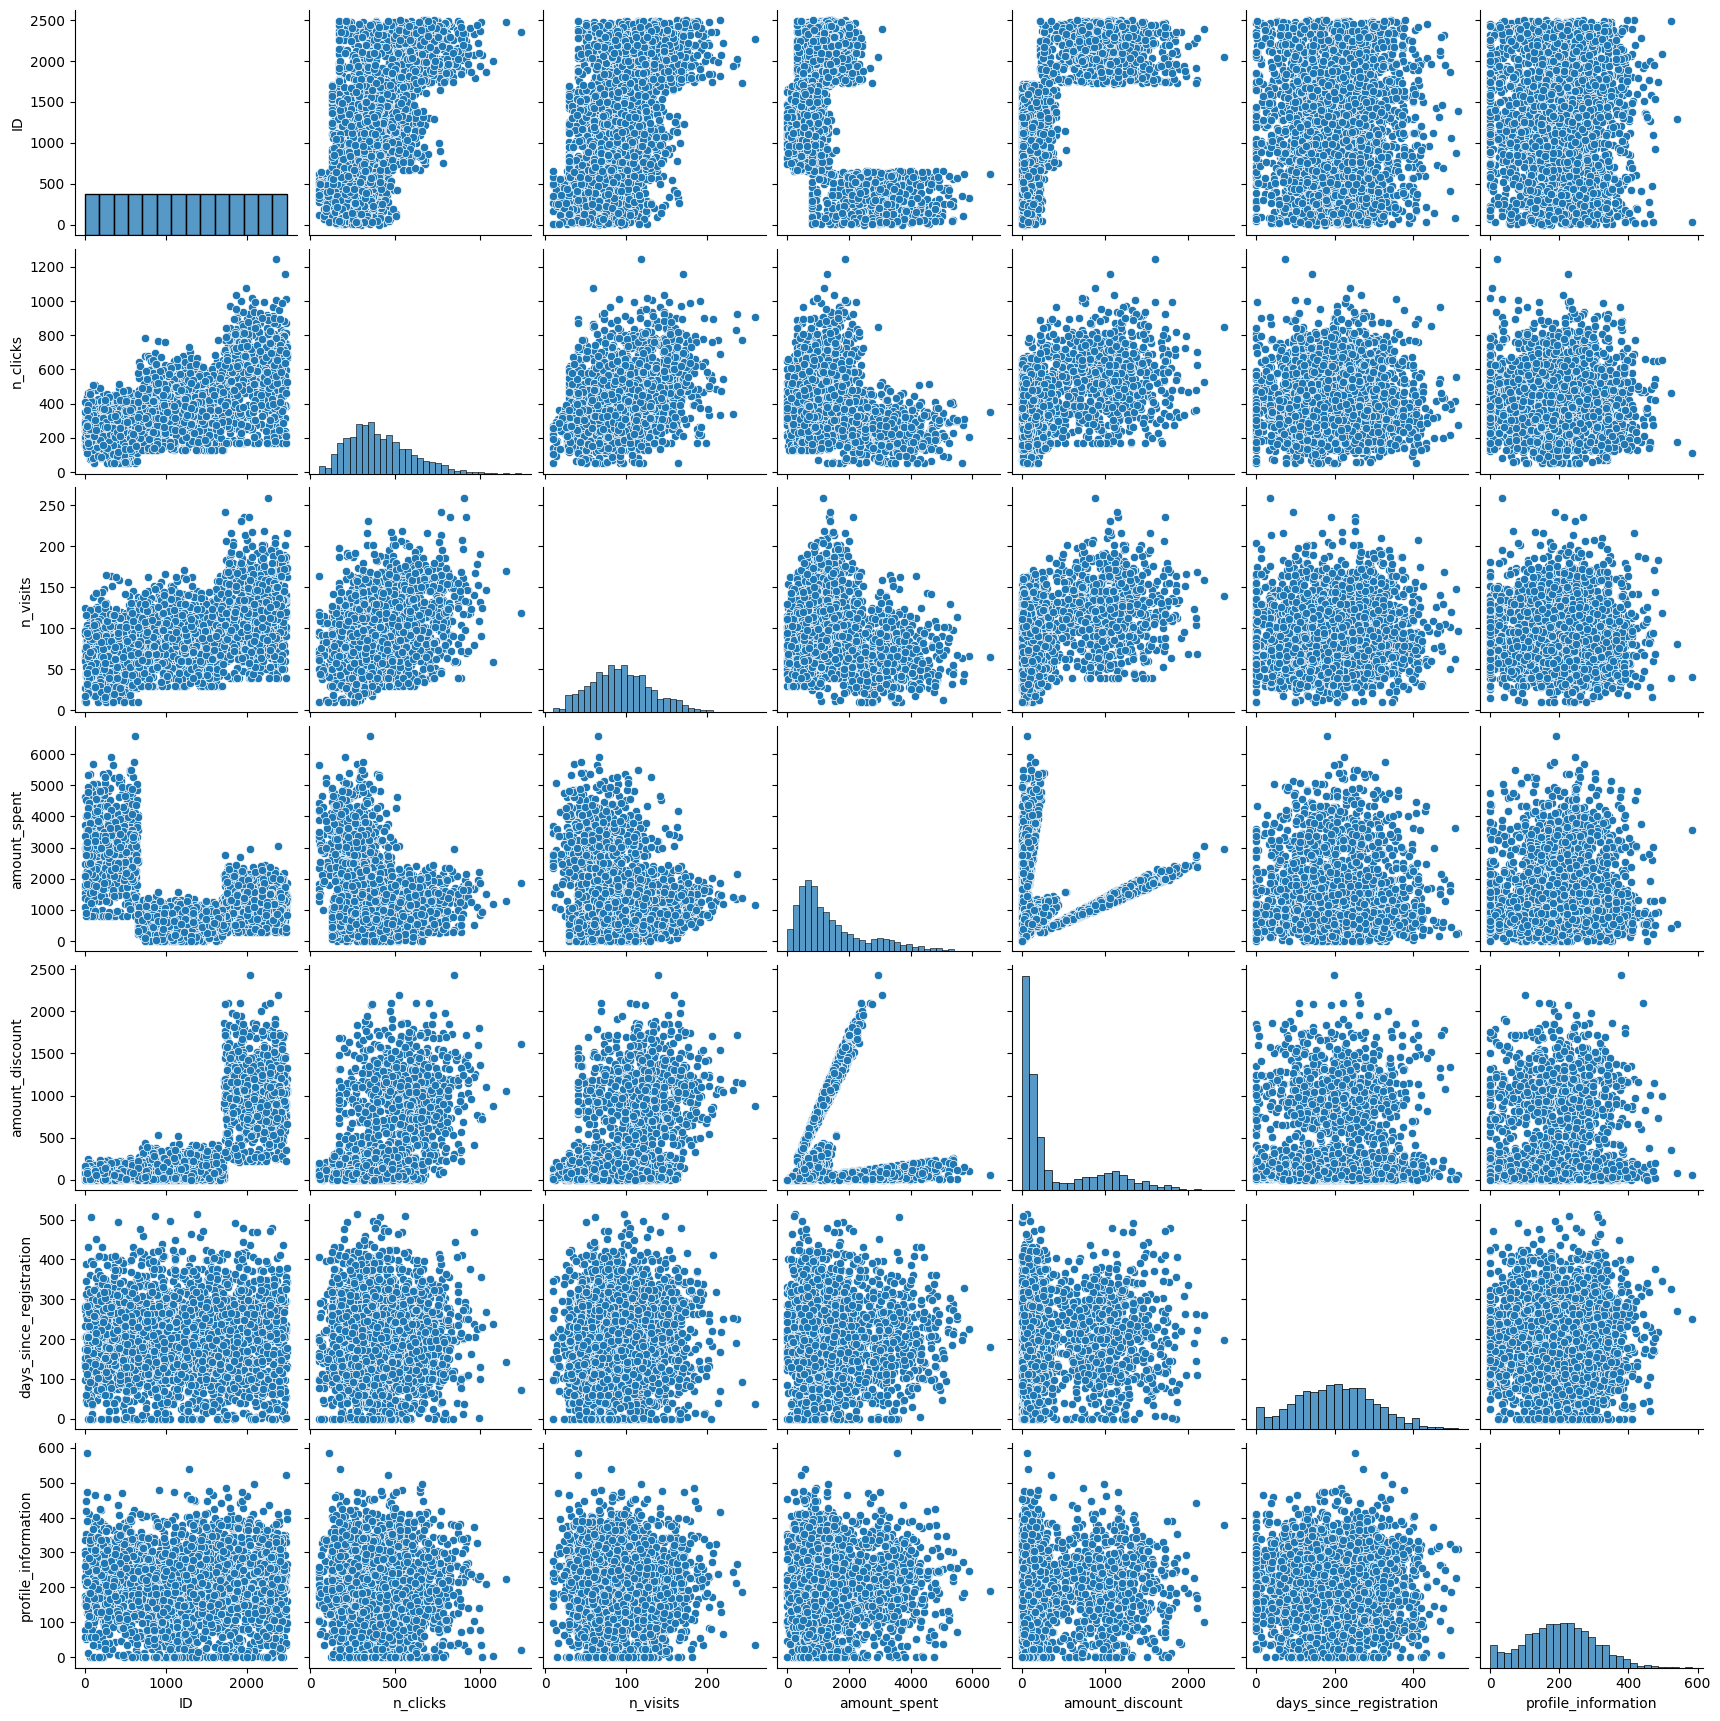

In [ ]:
sns.pairplot(df)

From pairplot, we can see:

- With multiple variables(dimensions), it is easier to identify patterns or if some data points are closer together forming cluster, using pairplot.

- Points that are closer together should have similar behaviour or characteristics.

#### **What could be the benefits of identifying patterns and groups in this data?**

If we can clearly distinguish these groups (segregate customers), the Amazon can:

- offer/show more discounted items to people who always buy discounted items

- show quality products to people who buy expensive products or buy more often,

- identify segment of customer who explore a lot but don't end up buying

###Quiz-3:
```
From the above two subplots in which subplot clusters are visible?

a. Amount spent and n_clicks
b. Amount discount and n_visits
c. None of them
```
Answer: a

**In the dataset we imported above, do you think variable 'ID' will be helpful for us while clustering using the same loss function we have defined?**

- No
- Euclidean distance is not the correct distance metric to use incase of categorical variable, as the euclidean distance between two instances of a categorical variable don't make sense.
- We shouldn't use categorical variable incase of K-means because the loss function we have defined in the objective is not suitable for a categorical variable, therefore let's drop it.


In [ ]:
X=df.drop("ID",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


### **Cleaning + Preprocessing**

**Some things to note about this data**

- CustomerID is just an identifier of the customer - its not a required parameter.
- No categorical variable, but we would have discarded that as well.
- No missing values.

In [ ]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


### Feature Scaling
**Can you observe something about the ranges of the features?**

- Features are on different scales.

**Should we or should we not we scale the variables for K-means?**

- K-Means is a distance-based algorithm. Because of that, it’s really important to perform feature scaling (normalize, standardize, or choose any other option in which the distance has some comparable meaning for all the columns).

- For our use case, we can use MinMaxScaler instead of StandardScaler,  transforming the feature values to fall within the bounded intervals (min and max), rather than making them to fall around mean as 0 with standard deviation as 1 (StandardScaler).

- MinMaxScaler is an excellent tool for this purpose. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Let's use K-means from scikit learn library.

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
labels=kmeans.labels_

In [ ]:
cluster_counts = pd.Series(labels).value_counts()

In [ ]:
cluster_counts

3    710
2    650
1    623
0    517
dtype: int64

Let's try to see what did the Kmeans predict?
- It predicted the cluster labels for all the points.

In [ ]:
y_pred

array([2, 2, 1, ..., 3, 0, 1], dtype=int32)

We can even retrieve the coordinates of centroids of clusters.

In [ ]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.27330589, 0.32493667, 0.11230841, 0.06740043, 0.56620473,
        0.34602498],
       [0.28589783, 0.31533458, 0.10716208, 0.06305475, 0.2394147 ,
        0.33093295]])

### Visualizing clusters

Let's create a dataframe where we will add a new column 'label' which will consist of the cluster labels assigned by k-means, for visualization purpose.

In [ ]:
clusters = pd.DataFrame(X_scaled, columns=X.columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,2
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,2
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1


In [ ]:
def visualize_clusters(clusters, title='KMeans Clustering'):
    plt.scatter(clusters.iloc[:, 0], clusters.iloc[:, 1], c=clusters['label'], cmap='viridis', edgecolors='k')
    plt.xlabel(clusters.columns[0])
    plt.ylabel(clusters.columns[1])
    plt.title(title)
    plt.show()


- There is some distinction between clusters, but making sense out of this is a bit hard from this plot.

**A better alternative would be a line polar plot from plotly library - useful for visualizing multi-dimensional data**

- Group the customers by labels and calculate mean for all the features.
- Melt the data to have features on rows along with their corresponding mean values

In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()


The reason this plot is called polar because all the coordinates are polar coordinates (i.e. circular)

#### **Insights**

- **Polar plot is read and interpreted radially**

  - values increase as we move away from the center, showing the influence of a feature on that label.
  - <font color="green"> green(2) </font> and <font color="purple"> purple(3) </font> overlap on all the features except one.

Looking at this plot, we have different  customer segments:
- **Bargain shoppers**(`label 1`) - people who buy heavily discounted items. **Action:** show them more discounted items. They are also frequent users who have joined the website relatively recent.

- **Inactive old users** (`label 2`) - people who have been a long time user of the app but have not shown much interest now. **Action:** start sending notifications, emails, etc - get them back on the platform.

- **New and inactive users** (`label 3`)- Users who have recently joined but haven't bought much and are not that actively looking for items. Somewhat similar to `label 2`.

- **Premium shopper** (`label 0`) - Affluent customers who don't visit the website very often, not click much but spend a lot of money. **Action:** Show them more quality




**Q. Should we try with a different number of clusters?**

**Q. Does number of clusters affect the performance of the model?**

Lets find out with number of clusters as $3$, $4$, and $5$.



In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter1.fit(X_scaled)
kmeans_iter2.fit(X_scaled)
kmeans_iter3.fit(X_scaled)

KMeans(init='random', n_init=1, random_state=0)

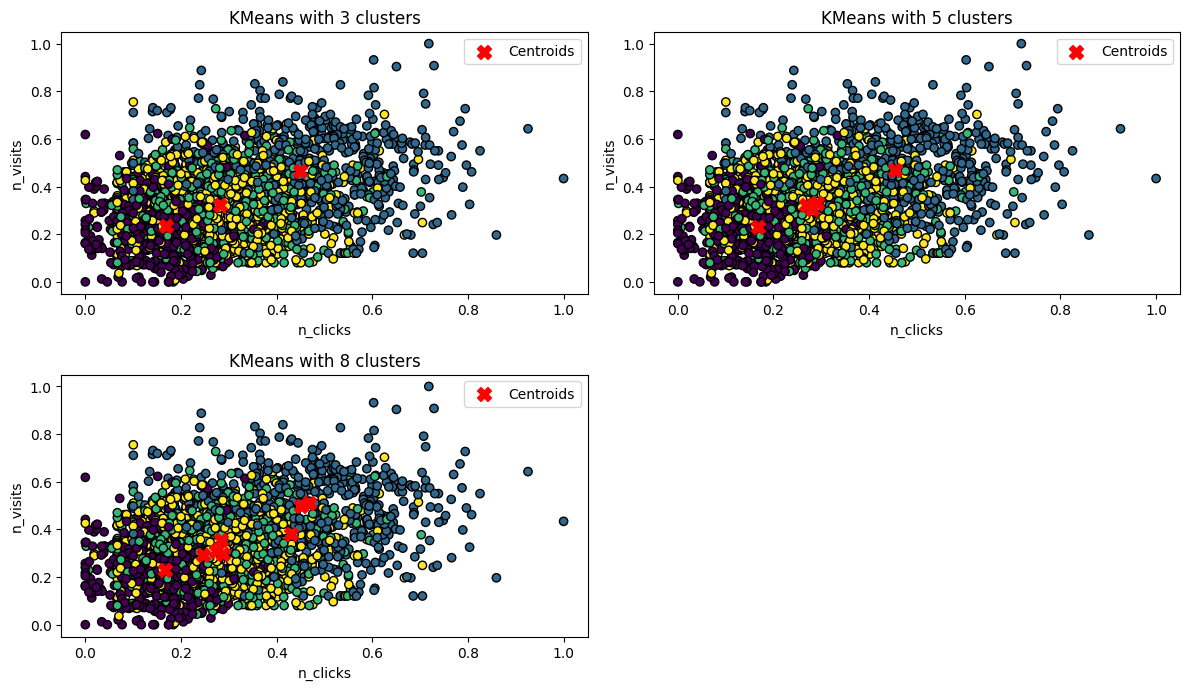

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(321)
viz_clusters(kmeans_iter1, title='KMeans with 3 clusters')

plt.subplot(322)
viz_clusters(kmeans_iter2, title='KMeans with 5 clusters')

plt.subplot(323)
viz_clusters(kmeans_iter3, title='KMeans with 8 clusters')

plt.tight_layout()
plt.show()

- So, Yes, the end results of K-Means depends on number of clusters.

**So, how many clusters are ideal? How to pick that?**
  - Using Inertia or WCSS

#### **How to select the best model?**

- To select the best model, we need a way to evaluate a K-Means model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets.

- But at least we can measure the distance between each instance and its centroid. This is the idea behind the **inertia metric**. The smaller the inertia value, the more coherent are the different clusters.

- The K-means algorithm aims to choose centroids that minimize the **inertia**, or **within-cluster sum-of-squares** criterion:

  - ${\sum_{i=0}^N min(||x_i - C_j||^2)}$ where;

    - N: No. of samples in dataset <br>
    - $x_i$ : Data Sample i <br>
    - $C_j$ : Centeroid of Cluster j



In [ ]:
kmeans_iter1.inertia_

280.16509626121075

In [ ]:
kmeans_iter3.inertia_

195.24159155451287

**As we increase the number of clusters, inertia decreases.**

**So, does that mean we should keep increasing the number of clusters for better performance?**

- No, we cannot simply take the value of **K** that minimizes the inertia, since it keeps getting lower as we increase **K**.
- Because, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.

### Quiz-4:
```
When will inertia reduce to zero?
a. All the points belong to same cluster.
b. All the points are cluster themselves.
```
Answer: b

**However, we can plot the inertia as a function of $K$ and analyze the resulting curve. This is known as the "Elbow-Method"**

### **Let's experiment with different number of clusters and plot their Inertia**

- Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of K
- Choose the K for which WCSS first starts to diminish.

**The steps can be summarized in the below steps:**
1. Perform K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The inflectionion point(elbow) in the plot is generally considered to be an indicator of the appropriate number of clusters.


In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

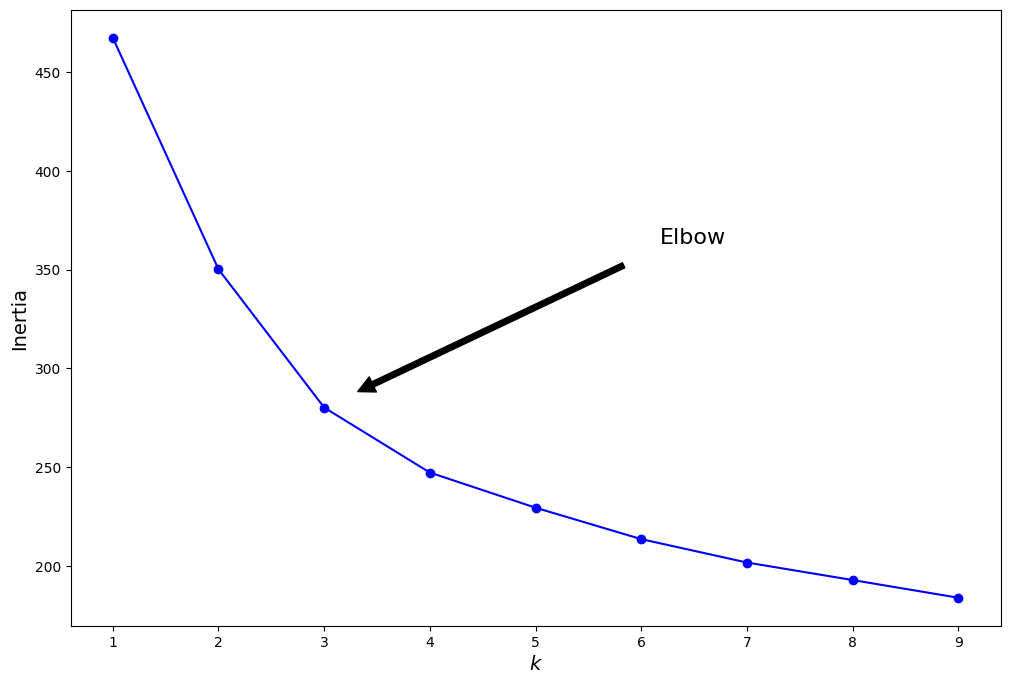

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

- Inflection point is near 3 or 4 where the drops sharply and then slows down
- 3 would be a good choice, any lower value would be dramatic, while any higher value would not help much.

  **The elbow is found when the dataset becomes flat or linear after applying the cluster analysis algorithm.**

But it's not a very precise method

- Elbow curve still relies on human interpretaion of where we see the slope changing.
- It gives a rough estimate only.

## **Silhouette Score**



- The silhouette score of a point **measures how close that point lies to its nearest neighbor points, across all clusters**.

- It provides information about clustering quality which can be used to determine whether further refinement by clustering should be performed on the current clustering.

- An instance’s silhouette coefficient is equal to $\Large\frac{(b – a)}{max(a, b)}$, where;

 - $a$ is the the mean intra-cluster distance (i.e., mean distance to the other instances in the same cluster)

 - $b$ is the nearest mean inter-cluster distance (i.e., the mean distance to the instances of the next closest cluster). It is defined such that the instance’s own cluster is excluding.



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/308/original/Screenshot_2022-08-02_at_6.47.39_PM.png?1659445799' height = '500' width = '800'>





#### **Q. What's the range of silhouette score?**

- The range of Silhouette score is [-1, 1].

- Score is $1$ when $b > a$ and $a = 0$

  - implying that the points in the same cluster are very close.
  - In this case the points within the same cluster are very close whereas the points in the other clusters are at some distance.



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/311/original/Screenshot_2022-08-02_at_7.05.22_PM.png?1659446843' height = '500' width = '800'>



- Score is $-1$ when $a > b$ and $b = 0$

  - In this case the points from the same cluster of the current instance are at some distance but the points from the other clusters are overlapping with the current instance.



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/310/original/Screenshot_2022-08-02_at_7.02.19_PM.png?1659446661' height = '500' width = '800'>



- Ideally we want our Silhouette score to be closer to $1$, because we do want that our inter-cluster distances should be greater than intra-cluster distances.

- This is a more precise alternative to **Inertia (within cluster sum of squares (also called SSE))** and Elbow curve!

- A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all the instances.



#### **Interpreting Silhouette scores**

- A coefficient close to $+1$ means that the instance is well inside its own cluster and far from other clusters,

- While a coefficient close to $0$ means that it is close to a cluster boundary,

- A coefficient close to $–1$ means that the instance may have been assigned to the wrong cluster.

Let's try to evaluate the algorithm for different values of k using Silhouette scores.

In [ ]:
from sklearn.metrics import silhouette_score

## silhouette score for 4 clusters
silhouette_score(X_scaled, kmeans.labels_)

0.2108404992330738

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

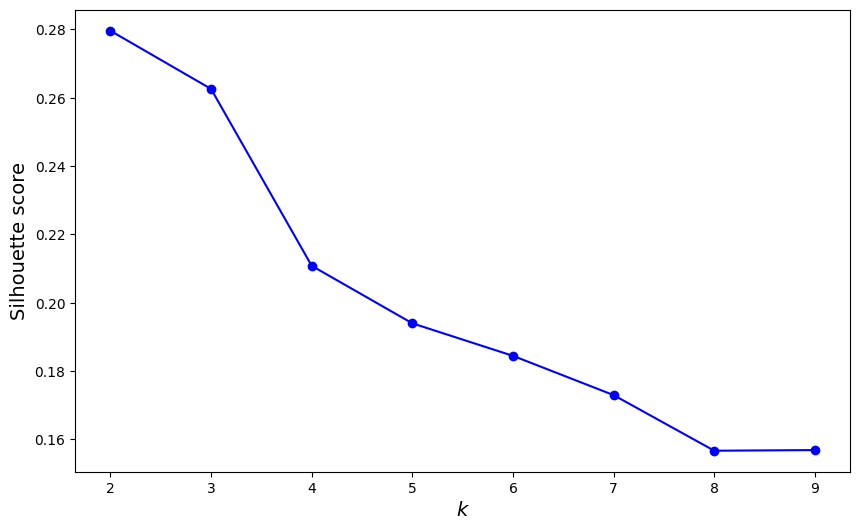

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

- We should pick 2 or 3 because after 3 there is a significant drop in the scores after 3.

- According to Elbow curve we wanted to pick 3 or 4, but according to Silhouette we can pick 2 or 3 therefore by taking common we can use 3.

- Even if we try to analyze the line polar curve, we can observe that the clusters 0 and 1 are quite the same except the difference in days after registration.

The strategy to pick 'K' should be:
1. Use the Silhouette score curve.
2. Use the elbow method.
3. Most importantly use the domain analysis.

The combination of the above 3 should be used for picking the right k.

**Note:** Silhouette Coefficient is only defined if number of labels is `2 <= n_labels <= n_samples - 1`.

## **K-Means Intitialization**

- K-Means is **Initialization dependent**. This is one of the major drawbacks of K-Means.

- This means, that the same data, with different initialization, will get different results (different clusters)

<img src='https://drive.google.com/uc?id=1KGZH4R5spf-nbx975TVct8POa7i8m3Wm'>


#### This is how K-Means would give different results with different initializations

<img src="https://drive.google.com/uc?export=view&id=1_8XrEVwmo47dHUkJfNKXXtF1CQE5eMG2">

* In Optimal Clustering results, results are sensible
* In Sub-Optimal Clustering, which probably doesn't make sense and won't be an optimal one


Using Python, let's see how random initialization gives different results over same data.

#####**K-Means Random-State 1**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



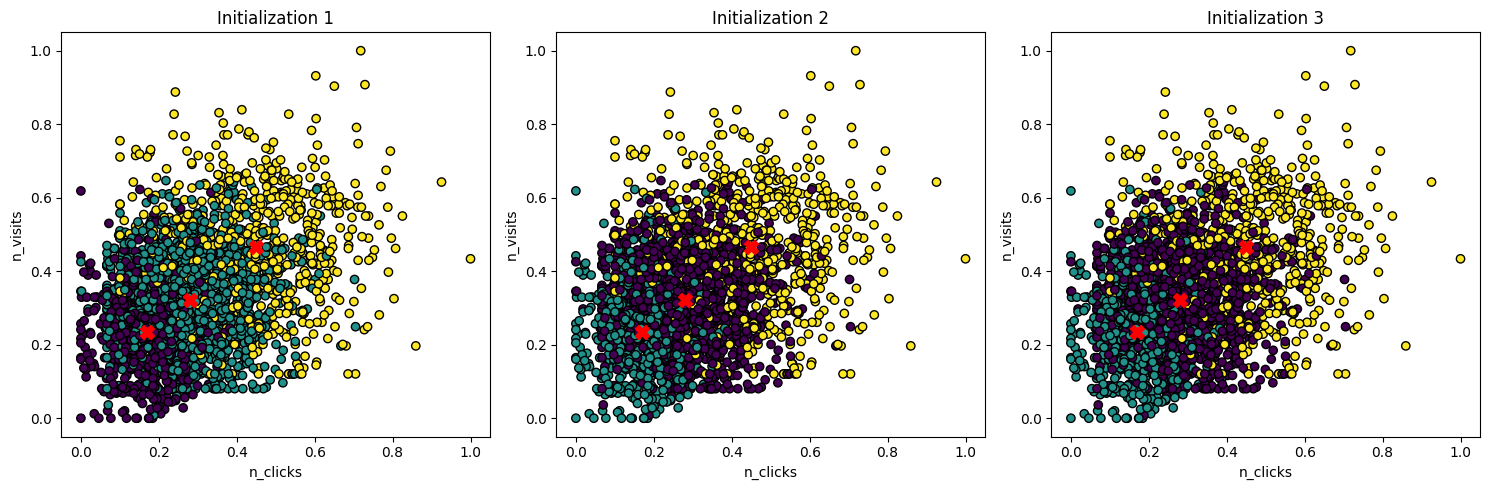

In [ ]:
# Create subplots for different initializations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, random_state in enumerate([0, 42, 100]):
    kmeans = KMeans(n_clusters=3, init='random', random_state=random_state)
    y_pred = kmeans.fit_predict(X_scaled)

    # Visualize the clusters for each initialization
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', edgecolors='k')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                    color="red", marker="X", s=100, label='Centroids')
    axes[i].set_title(f'Initialization {i + 1}')
    axes[i].set_xlabel(X.columns[0])
    axes[i].set_ylabel(X.columns[1])

plt.tight_layout()
plt.show()

#### **Q. Why it is important to choose good Initial Centroids?**

1. Good Initialization

 * Suppose you've initialized three centroids C1, C2, and C3
 * We know that centroids get updated after each iteration
 * When they don't, we conclude that K-Means has converged
 * The diagram shows three such clusters: S1, S2 and S3
 * This seems like a good initialization

<img src="https://drive.google.com/uc?export=view&id=1bP-rLsBKfqHmWCiqynzXvjfVwmX0jBii">


2. Bad Initialization:
  * Suppose we've initialized three clusters C1, C2, and C3 in different way
  * After iteration 4, the centroids didn't get updated
  * We conclude that K-Means has converged after 5 iterations
  * We've still clustered datapoints into 3 groups, but they are not optimal


<img src="https://drive.google.com/uc?export=view&id=1j7WfPAxskKBQ08fMY68RdX03uB52wDOR">

#### **Q. So, how to deal with initialization problem in K-Means?**

- Remember dunn index from previous lecture;
  $D = \Large\frac{min_{i,j} distance(i,j)}{max_k distance^{'}(k)}$; where,

    - distance(i,j) → distance between the farthest points of the clusters $C_i$ and $C_j$ → **Inter-Cluster distance**

- We also learnt Lloyd's Algorithm in the previous lecture in which we randomly intialize the centroids and based on the distances of centroids, we keep updating them until convergence.

- One way to deal with initialization problem would be to try different initializations for Lloyd's Algorithm and pick the best one out of it based on Dunn Index or any other evaluation metric

- But, this is a brute force approach

- This brings us to another algorithm: **K-Means++**


<img src="https://drive.google.com/uc?export=view&id=1XhLKZp7aPuWJ45wEL2SaCQEYaYYkuto9">
<img src="https://drive.google.com/uc?export=view&id=1dZgwmRPZLfZ2Z_MgHbRHqDhUvPQu5Thm">

## **K-Means ++**



* Consider a data where we want to initialize 3 centroids.
* We pick first centroid at random
* Now, to pick the second centroid, we want to pick a point that is as far away as possible

#### Why pick a centroid that is far away?
- Because, if you think about it, if we pick two centroids closer to each other, we'll get two clusters for that region of data points.

**Q. But, what's the problem in getting two clusters instead of a single one?**

- Most of the times data points belonging to the same region will share similar characteristics and they should ideally belong to one cluster, instead of two.

- So, what we do is compute the distance from centroid $C_{1}$ of all the datapoints present in our dataset $D$ such as: $D$ - {$C_{1}$}

- But there's a little risk with this.

- If we select a datapoint as a second centroid with the farthest distance, then an outlier might be picked as a centroid, and we might have a cluster with the centroid $C_{2}$ only

###Quiz-1: [POLL]
```
Can you think of the best way to mitigate the outlier centroid issue.

a. Pick with probability proportional to distance
b. Pick a point with 95 percentile distance
c. Remove outliers before clustering
d. Clip the outliers before clustering.


```
Answer:
- Clipping is wrong because you are changing the postion of a point.
- Removing is also not prefered because you will not be able to say anything about those points.
- 95 percentile distance - why 95, choosing this parameter will again be manual.
- Probabilistic approach works well. Lets see that in more detail

#### Q. Is there a way to avoid picking an outlier as a centroid?
- Yes! Instead of picking a centroid deterministically, we can pick a centroid probabilistically

- We do this in such a way that the probability of picking a centroid is proportional to the distance from the first centroid $C_{1}$

- This concept works really well unless there is an outlier with crazy high values

<img src="https://drive.google.com/uc?export=view&id=1ynRdMdJltByaY2PdZdJmFpDNWZcwXubo">

#### Now, how to pick next centroids?
- For all points, we will compute the distance: dist($C_{1}, X_{i}$) + dist($C_{2}, X_{i}$) such that $X_{i} \in D$ - ${C_{1}, C_{2} }$
- This will distances from both $C_{1}$ and $C_{2}$ (average them)
- Now, pick a point probabilistcally

- So, for picking $K$ centroids, we pick first centroid randomly, and then we pick ${i}^{th}$ centroid in the probabilistic fashion as a point which has the highest from all the previously chosen centroids.

###Quiz-2:
```
When we define a very large value of K, we start picking first centroid as the farthest possible point with the origin (0,0).
Is it True or False?

a. True
b. False
```
Answer: b. False First centroid is random

#### What type of distance to use?
- Any type of distance can be used for K-Means ++. For e.g. Euclidean Distance, Cosine Similarity or an Angular difference
- The basic idea remains the same.

We saw how K-Means++ can be used instead of K-Means to solve the problem of **Initialization**. So, can we use K-Means++ all the time regardless of the business case that we want to solve.

NO! There are other limitations of K-Means++, which by default will also apply to K-Means as well. Let's have a look at them.

## **Limitation of KMeans/KMeans++**


##### **Differing Size**

- Because of the way Lloyd's algorthm work, K-Means always tries to make clusters of same size

<img src="https://drive.google.com/uc?export=view&id=1DKEwQtMCsrBcstUzLOlX06wkMBvJjiCO">

> Q. How can we solve this?

- One way of solving this problem would be to increase the value of K.
- Once clusters are formed, the similar clusters can be grouped together to form a mega cluster.
- The problem with this approach is the grouping of similar clusters is not easy

<img src="https://drive.google.com/uc?export=view&id=1GMiOosbfxOt4O3G-uplE5Iu7Xt24BZmd">
<img src="https://drive.google.com/uc?export=view&id=1x-XLirB4SUdnaqfnmxaYZOXWlpxF-RwL">

##### **Differing Density**

- K-Means is not good when you've clusters of different density, not even K-Means ++

<img src="https://drive.google.com/uc?export=view&id=18s3PCi_JVCaxSqgXSJmewy9wP26GeGM2">

#### **Non-Globular Shapes**

- Another limitation of K-Means is that it cannot work on non-globular shapes, i.e. Non- spherical shapes

<img src="https://drive.google.com/uc?export=view&id=15ELbeS7zULGstT8Zsx3fF-AB1L7eSh_L">

- The same strategy of increasing $K$ value can be applied.
- Though it is fairly hard to visualize and combine clusters

<img src="https://drive.google.com/uc?export=view&id=1afKW-pXFDVFUJwslqsspJ5HcNWbvqM_2">

#### Q. What are some Hacks for dealing with Non-Globular Shapes?

- For dealing with the problem of differing densities and non-globular shapes, same idea of increasing the value of $K$, and then combining similar clusters can be applied

- This is fairly hard to combine let alone visualize in multi-dimensional space

**Note:** These limitations are also shared by KMeans++.

## KMedian and KMedoid

We saw that how Kmeans is impacted by outlier.


However,
Using Kmeans++ initialization helps us
- with mitigating this problem.

Apart from Kmeans++,
- there are other methods as well which can help us in addressing this issue.

### K-median

The algo is similar to Kmeans

Let's look into it.

#### Algo

**STEP 1: Initialization**

First, we initialize the cluster centers. (another name for centroids)

**STEP 2: Repeat until convergence**

$ $

1. Assignment
    - each of the point is assigned to the closest cluster

2. Update cluster center


For Kmeans,
-  centroid update equation was: $C_j = \frac{1}{|S_j|} * Σ_{x_i∈S_j} x_i$
- i.e. taking the mean of all the points belonging to the cluster to compute new centroid.
    
In Kmedian,
- instead of find the mean, we find the median.

#### Why Kmedian is less sensitive to outliers ?

Since we are using median to find the updated cluster center,
- and median is less sensitive to outliers as compared to mean

This makes Kmeans less sensitive to outlier

### Issue with the algos so far

There's one basic problem with the algos we have learnt so far





At the end of it,
- we get centroid $C_1, C_2, C_3, ... C_k$


Originally, we are given
- Dataset $D$ = {x_1, x_2, x_3, .. x_n}

Since, centroid represent the clusters,
- we will want to interpret the centroid

Using the Kmeans, Kmeans++ or Kmedian, there centroid
- may **not be interpretable**



Let's understand this with an example:

Say, we are given Amazon customer data where
- $x_i$ represent each customer

Now,
- The centroids $C_1, C_2, .. C_k$
    - were computed using geometric mean / median

So, it is highly likely that these centroid
- is not a datapoints present in dataset (as we took the mean)

and we can't make a sense out of it.

#### How can we deal with issue ?

**Requirement**:

Instead of getting $C_j$s centroids computed using mean/median
- we want actual datapoints ($x_i$ ∈ D) belonging to dataset as our centroids

Ultimately,
- we want to make sense out of centroid

which can be satisfied if it is an actual datapoint

**Big idea** is: What if each centroid is a datapoint in $D$?

- The system where this happens is called **K-medoids**